<a href="https://colab.research.google.com/github/denisecammarota/matbio/blob/master/tp1/P1_Ej5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1 - Ejercicio 5**: *Población de animales costeros*
***Matemática de los Sistemas Biológicos - 2021***

**Alumna**: Denise S. Cammarota

In [1]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy, scipy.stats

En este ejercicio, nos piden estudiar una población de animales costeros, que viven entre líneas de marea alta y baja. Estos individuos son vulnerables a eventos desastrosos como tormentas, que los afectan según su intensidad y el estado de la marea. Para modelar estas poblaciones, nos proponen considerar una evolución determinista entre desastres que suceden a tiempos aleatorios. Si llamamos $N$ a la población, las reglas de evolución son:

1.   El crecimiento entre desastres es logístico: $\dot{N} = r N (1- \frac{N}{K})$ 
2.   Si ocurre un desastre a tiempo $t$, instantáneamente la población se reduce en una fracción $p$: $N(t^{+}) = p N(t)$
3. Los tiempos entre desastres siguen una distribución exponencial con media $1/\lambda$.

Nos piden analizar el comportamiento del sistema y encontrar una condición que caracterice la posibilidad del sistema de recuperarse de un desastre. Recordemos que tenemos como parámetros $N(0), \lambda, K, p$ y $r$, ya que no nos dan valores fijos para ninguno de estos parámetros. 

(La celda siguiente del Google Colaboratory contiene el código para la simulación, con un enfoque de programación orientada a objetos en Python)

In [2]:
#@title 
class SimSpecies():
  def __init__(self,n0,l,k,p,r,tmax): 
    np.random.seed(1)
    #metodo de instanciacion
    #parametros 
    self.n0 = n0
    self.l = l
    self.k = k
    self.p = p
    self.r = r
    #tiempo max lim iteraciones
    self.tmax = tmax
    #lista de tiempo y de valores de n
    self.t = [] 
    self.n = []
    #inicializo tiempo y n en listas
    self.n.append(n0)
    self.t.append(0)
  def TimeDisaster(self):
    #metodo de encontrar prox desastre
    tmp = np.random.exponential(1/self.l)
    self.t.append(self.t[-1]+tmp)
  def EvLogistic(self):
    #metodo de evolucion entre desastres (log sol: https://mathworld.wolfram.com/LogisticEquation.html)
    tinicial = self.t[-2]
    tfinal = self.t[-1]
    ninicial = self.n[-1]
    if (ninicial == 0):
      nfinal = 0
    else:
      nfinal = ((1 + ((self.k/ninicial) - 1)*(np.exp(-self.r*(tfinal-tinicial))))**(-1))*(self.k)
    self.n.append(nfinal)
  def EffDisaster(self):
    #metodo de efecto de desastre
    self.n[-1] = self.n[-1]*self.p
  def IterateOnce(self):
    #metodo de una sola iteracion
    #encuentro el tiempo del proximo desastre
    self.TimeDisaster()
    #evoluciono logisticamente hasta ese desastre
    self.EvLogistic()
    #ocurre el desastre
    self.EffDisaster()
  def IterateTotal(self):
    #metodo de iterar todo el tiempo
    while (self.t[-1] < self.tmax):
      self.IterateOnce()

### Cambio de los valores de $r$ y de $\lambda$, diferentes valores de $p$

Hacemos evolucionar el sistema para distintos valores de $r$ y $l$ fijos, variando $p$ con intervalos de $0.1$ entre $0$ (no hay recuperación) y $1$ (no sufren daños ante un desastre). Cabe aclarar que los desastres ocurren a iguales tiempos para los distintos parámetros $r$, $l$ y $p$ utilizados. Para el resto de los parámetros, utilizaremos siempre $N(0) = 0.1$ y $K=1$. Por lo tanto, el valor límite para la población es $1$. 

Intuitivamente, esperamos que si $r > l$, entonces la especie pueda sobrevivir a desastres, ya que esta condición implica que $1/r < 1/l$ y que el tiempo promedio de entre desastres es mayor que el tiempo promedio de recuperación. 

El primero corresponde a $r = 10$ y $l = 2$ de manera que $r>l$. Como es esperable, se observa que las poblaciones sobreviven a desastres para los valores de $p$ analizados que son mayores a cero, lógicamente.

El segundo corresponde a $r=0.1$ y $l=2$, tal que $r<l$. En este caso, tenemos que las poblaciones son más propensas a extinguirse a causa de desastres. Obviamente, esto no sucede en el caso de $p = 1$, ya que la especie no sufre una disminución ante desastres. Por otra parte, observamos que para $p=0.9$ la especie tampoco se extingue, a pesar de que $r<l$. 

#### Parámetros: $r = 10$ y $l = 2$, diferentes $p$

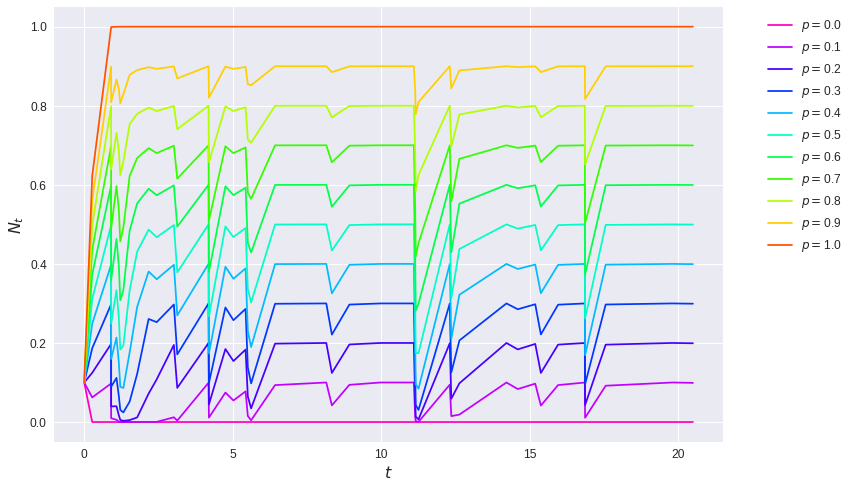

In [13]:
#@title 
p = np.linspace(0,1,11)
NUM_COLORS = len(p)
cm = plt.get_cmap('gist_rainbow_r')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
#colores: https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib
for i in range(NUM_COLORS):
  n0 = 0.1 
  l = 2
  k = 1
  r = 10
  tmax = 20
  a = SimSpecies(n0,l,k,p[i],r,tmax)
  a.IterateTotal()
  ax.plot(a.t,a.n,label=r'$p = $'+str(round(p[i],2)))
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$N_t$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12,bbox_to_anchor=(1.05, 1))
plt.show()

#### Parámetros: $r = 0.1$ y $l = 2$, diferentes $p$

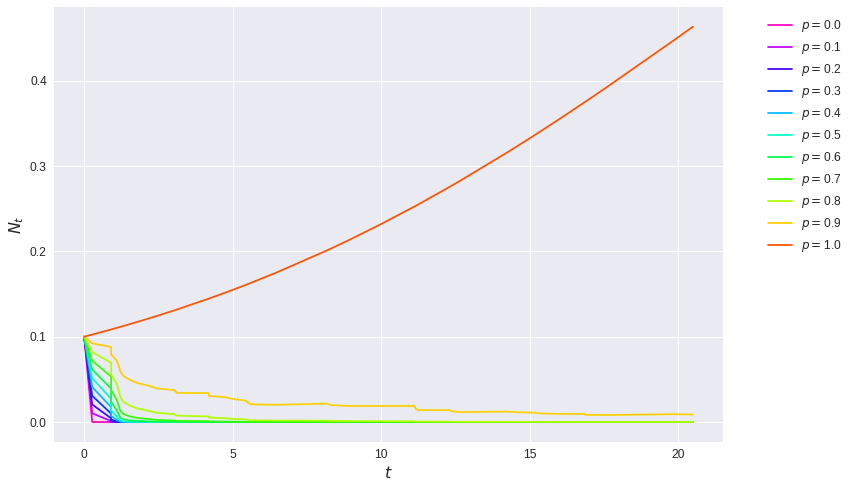

In [30]:
#@title 
p = np.linspace(0,1,11)
NUM_COLORS = len(p)
cm = plt.get_cmap('gist_rainbow_r')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
#colores: https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib
for i in range(NUM_COLORS):
  n0 = 0.1 
  l = 2
  k = 1
  r = 0.1
  tmax = 20
  a = SimSpecies(n0,l,k,p[i],r,tmax)
  a.IterateTotal()
  ax.plot(a.t,a.n,label=r'$p = $'+str(round(p[i],2)))
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$N_t$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12,bbox_to_anchor=(1.05, 1))
plt.show()

#### Parámetros: $r = 0.8$ y $l = 2$, diferentes $p$

Finalmente, observamos que para valores intermedios como $r=0.8$, tenemos especies que sobreviven según su valor de $p$ sea mayor a $0.6$. Con lo cual, una condición más rigurosa sobre la supervivencia a desastres debería incorporar una dependencia con $p$.  

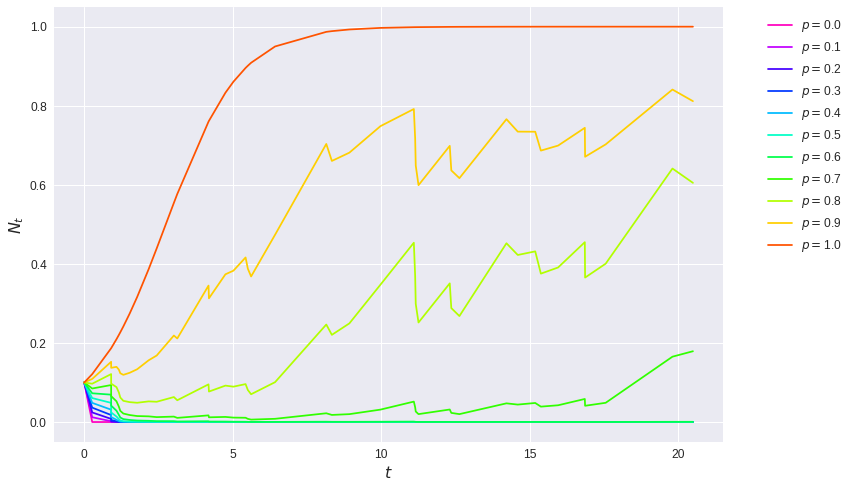

In [23]:
#@title 
p = np.linspace(0,1,11)
NUM_COLORS = len(p)
cm = plt.get_cmap('gist_rainbow_r')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
#colores: https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib
for i in range(NUM_COLORS):
  n0 = 0.1 
  l = 2
  k = 1
  r = 0.8
  tmax = 20
  a = SimSpecies(n0,l,k,p[i],r,tmax)
  a.IterateTotal()
  ax.plot(a.t,a.n,label=r'$p = $'+str(round(p[i],2)))
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$N_t$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12,bbox_to_anchor=(1.05, 1))
plt.show()

Esto mismo puede observarse para otros valores de $r$ y $l$, como se observa en la próxima figura, correspondiente a $l=1$ y $r=0.2$.

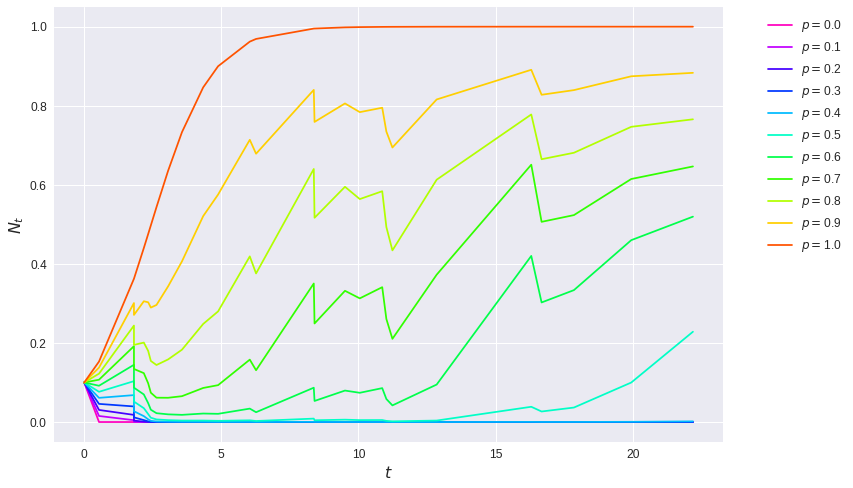

In [34]:
#@title 
p = np.linspace(0,1,11)
NUM_COLORS = len(p)
cm = plt.get_cmap('gist_rainbow_r')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
#colores: https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib
for i in range(NUM_COLORS):
  n0 = 0.1 
  l = 1
  k = 1
  r = 0.9
  tmax = 20
  a = SimSpecies(n0,l,k,p[i],r,tmax)
  a.IterateTotal()
  ax.plot(a.t,a.n,label=r'$p = $'+str(round(p[i],2)))
plt.xlabel(r'$t$',fontsize=16)
plt.ylabel(r'$N_t$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12,bbox_to_anchor=(1.05, 1))
plt.show()